In [131]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pytesseract

In [132]:
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'

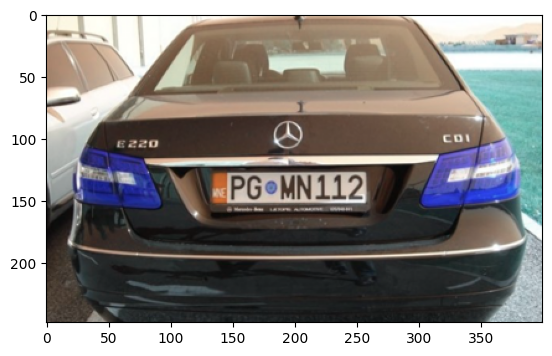

In [133]:
carplate_img=cv2.imread('./Cars1.png')
# carplate_img_gray=cv2.cvtColor(carplate_img,cv2.COLOR_BGR2GRAY)
plt.imshow(carplate_img)

In [134]:
carplate_haar_cascade=cv2.CascadeClassifier('./haarcascade_russian_plate_number.xml')

In [135]:
def carplate_detect(image):
    carplate_overlay = image.copy() 
    carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_overlay,scaleFactor=1.1, minNeighbors=3)
    for x,y,w,h in carplate_rects: 
        cv2.rectangle(carplate_overlay, (x,y), (x+w,y+h), (255,0,0), 5) 
        
        return carplate_overlay

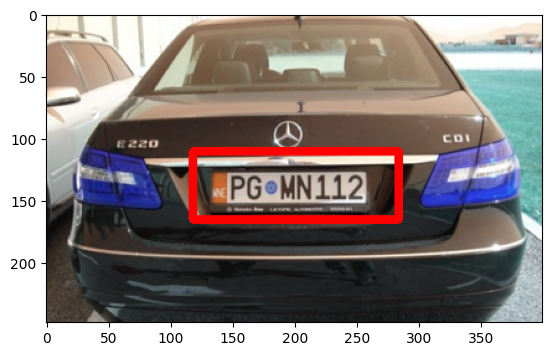

In [136]:
detected_carplate_img=carplate_detect(carplate_img)
plt.imshow(detected_carplate_img)

In [137]:
# extracting car licence palte

def carplate_extract(image):
    carplate_rects=carplate_haar_cascade.detectMultiScale(image,scaleFactor=1.1,minNeighbors=5)
    
    for x,y,w,h in carplate_rects:
        carplate_img=image[y+15:y+h-10 ,x+15:x+w-20]
        return carplate_img

In [138]:
# enlarging image

def enlarge_img(image,scale_percent):
    width = int(image.shape[1]*scale_percent/100)
    height= int(image.shape[0]*scale_percent/100)
    dim=(width,height)
    resized_image = cv2.resize(image,dim,interpolation=cv2.INTER_AREA)
    return resized_image

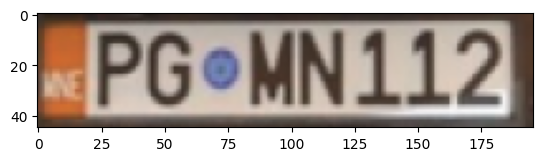

In [139]:
# displaying extracted car licence plate image
carplate_extract_img = carplate_extract(carplate_img)
carplate_extract_img = enlarge_img(carplate_extract_img, 150)
plt.imshow(carplate_extract_img)

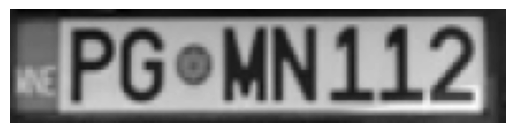

In [140]:
carplate_extract_img_gray=cv2.cvtColor(carplate_extract_img,cv2.COLOR_RGB2GRAY)
plt.axis('off')
plt.imshow(carplate_extract_img_gray,cmap='gray');

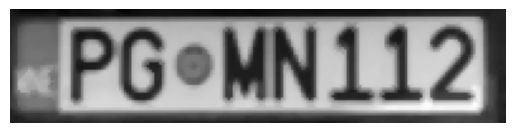

In [141]:
# smoothening the image
carplate_extract_img_gray_blur=cv2.medianBlur(carplate_extract_img_gray,3)
plt.axis('off')
plt.imshow(carplate_extract_img_gray_blur,cmap='gray')


In [142]:
# displaying the text extracted from the car plate
print(pytesseract.image_to_string(carplate_extract_img_gray_blur, 
                                  config = f'--psm 12 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

PGMN112

